## Подготовка датасета

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Датасет для предсказания депрессии у студентов  
https://www.kaggle.com/datasets/hopesb/student-depression-dataset

In [2]:
# Присвоим переменной «url» ссылку на датасет:

url = 'C:/Users/leous/.vscode/Data_Mining/content/Thyroid_Diff.csv'

# используем Pandas read_csv():

dataset = pd.read_csv(url)

In [3]:
dataset.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,TT,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
aim_col = 'Recurred'

In [5]:
df = dataset.copy()
# df = df.drop('id',axis=1)

In [6]:
mas_float64 = df.select_dtypes(include=['float64', 'int64']).columns
mas_bool =  df.select_dtypes(include=['bool']).columns
mas_others =  df.select_dtypes(exclude=['float64', 'int64', 'bool']).columns

def fillna_with_median_mode(df):
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            # Если столбец категориальный, заполняем модой
            mode_value = df[col].mode().iloc[0]
            df[col].fillna(mode_value, inplace=True)
        else:
            # Если столбец числовой, заполняем медианой
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True) 
    return df

df = fillna_with_median_mode(df)
vals = df[aim_col].unique().copy()

mapping = {}
for col in df.columns:
    if not col in mas_float64:
        val = df[col].unique()
        d = {}
        for i, name in enumerate(val):
            d[name] = i
        df[col] = df[col].map(d)


In [7]:
vals

array(['No', 'Yes'], dtype=object)

In [8]:
df.head()

,Age,Gender,Smoking,Hx_Smoking,Hx_Radiothreapy,Thyroid_Function,Physical_Examination,Adenopathy,Pathology,Focality,Risk,TT,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [9]:
m_clust = df[aim_col].unique()
m_clust

array([0, 1], dtype=int64)

In [10]:
# cols_for_clusters = ['Gender', 'Age', 'City', 'Profession', 
#        'Academic_Pressure', 'Work_Pressure', 
#        'CGPA', 'Study_Satisfaction', 'Job_Satisfaction', 
#        'Sleep_Duration', 'Dietary_Habits', 'Degree', 
#        'Have_you_ever_had_suicidal_thoughts_?', 'Work_Study_Hours', 
#        'Financial_Stress', 'Family_History_of_Mental_Illness']
cols_for_clusters = [x for x in df.columns if x != aim_col]

cols = cols_for_clusters
X = df[cols_for_clusters]
y = df[aim_col]
yvals = y



### Метод главных компонентов (Principal Component Analysis, PCA)



In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

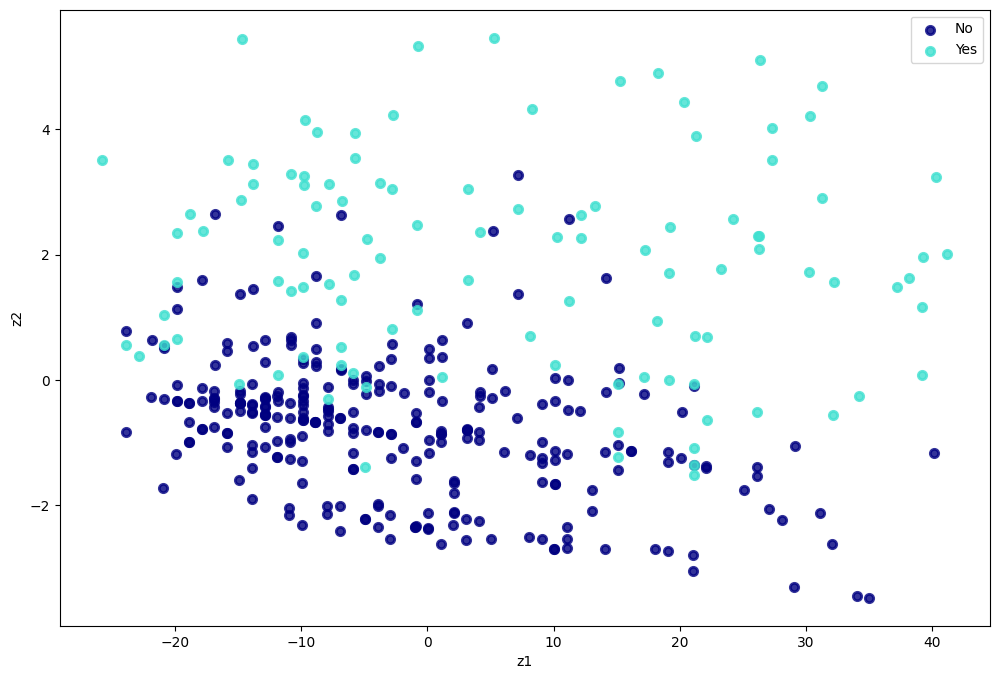

In [12]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, m_clust, cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()


Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio. Используя наш набор данных iris, мы можем вызвать explained_variance_ratio следующим образом:



In [13]:
pca.explained_variance_ratio_

array([0.96849571, 0.01317029])

Как вы можете видеть выше, первые главные компоненты сохраняют 92% дисперсии набора данных iris, тогда как вторые главные компоненты сохраняют только 5% дисперсии. Это указывает на то, что мы, скорее всего, получим хороший результат, если еще больше уменьшим размерность до 1D.

### Независимый анализ компонентов (Independent Component Analysis, ICA)


In [14]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

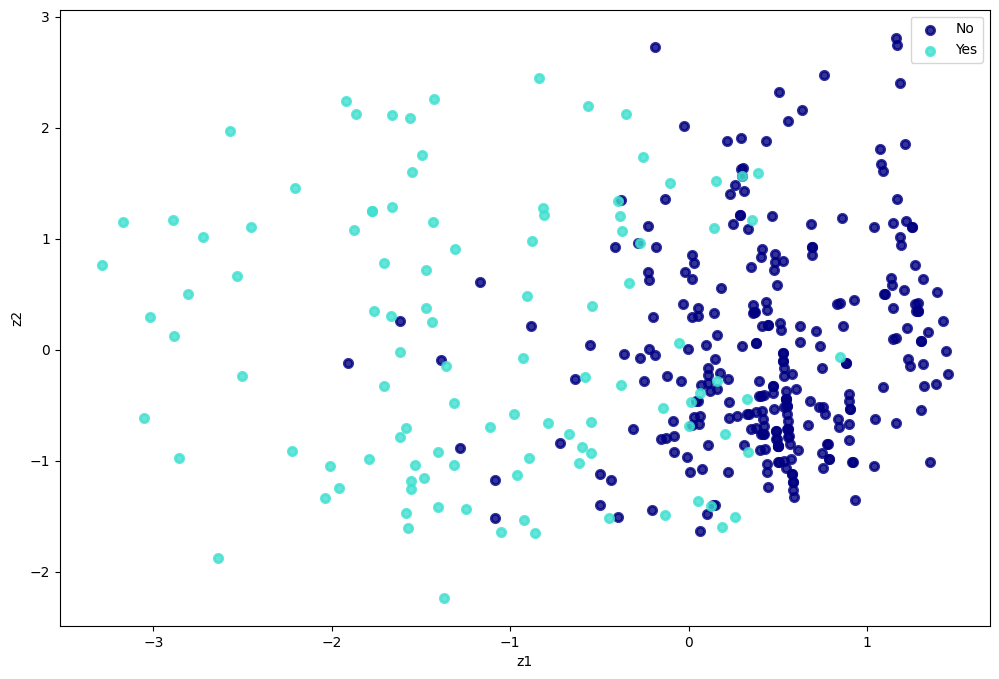

In [15]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, m_clust, cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### Kernel PCA


In [16]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

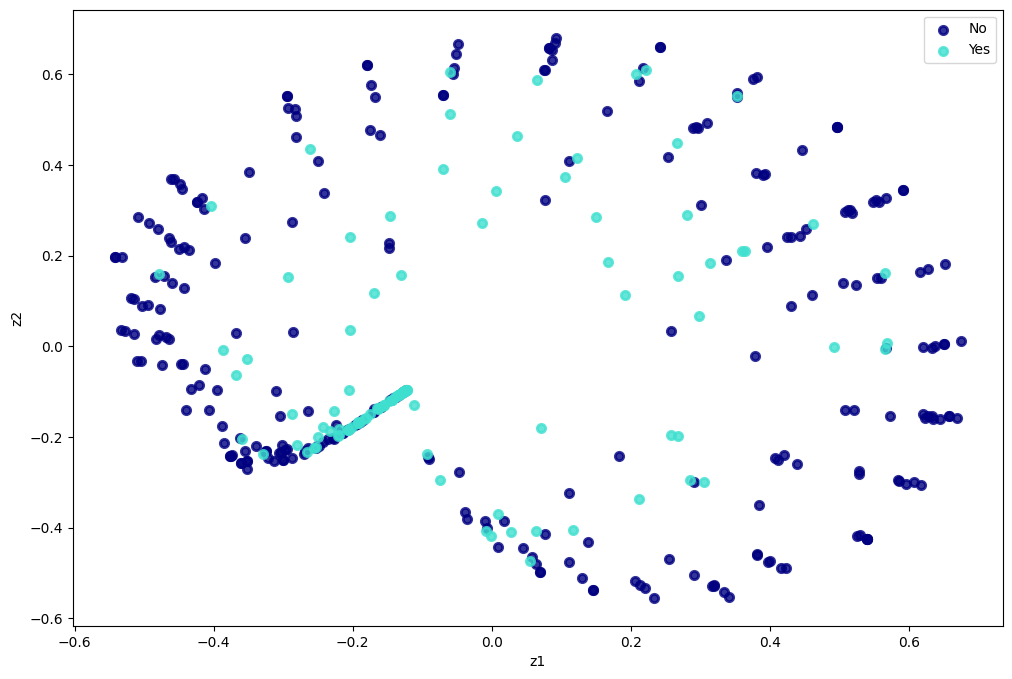

In [17]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, m_clust, cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE



In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [19]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (383, 16)
New Shape of X:  (383, 2)
Kullback-Leibler divergence after optimization:  0.29244229197502136
No. of iterations:  949


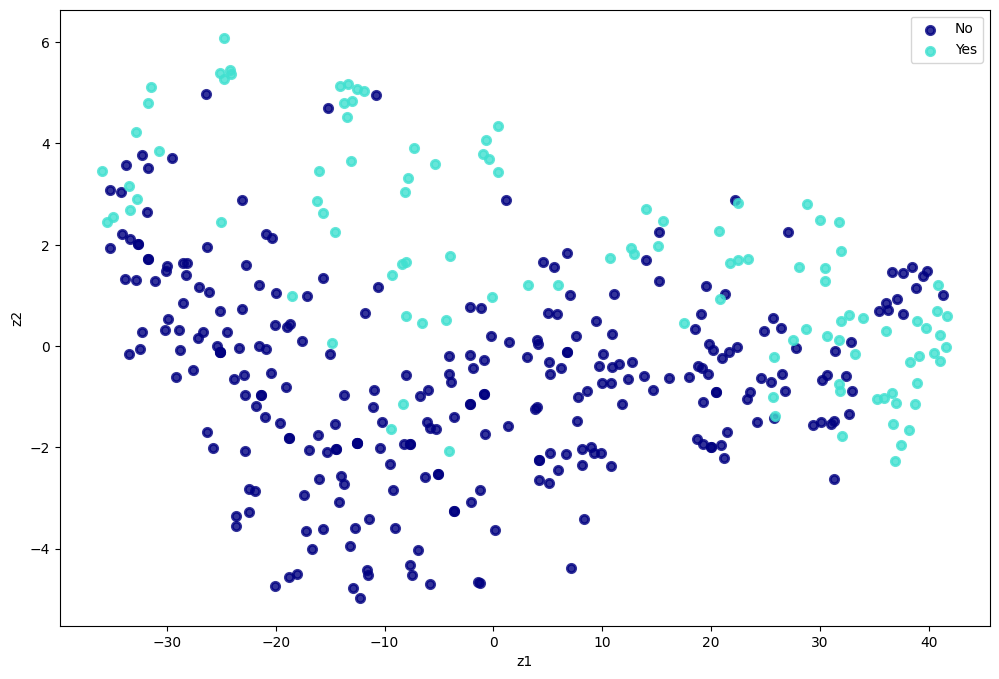

In [20]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, m_clust, cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

# Поиск выбросов. DBSCAN

## DBSCAN для кластеризации

In [79]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [80]:
dbscan_cluster1 = DBSCAN(eps = 4.5, min_samples = 2)
dbscan_cluster1.fit(X)

DBSCAN(eps=4.5, min_samples=2)

In [81]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 5
v_measure = 0.05145942355353065


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


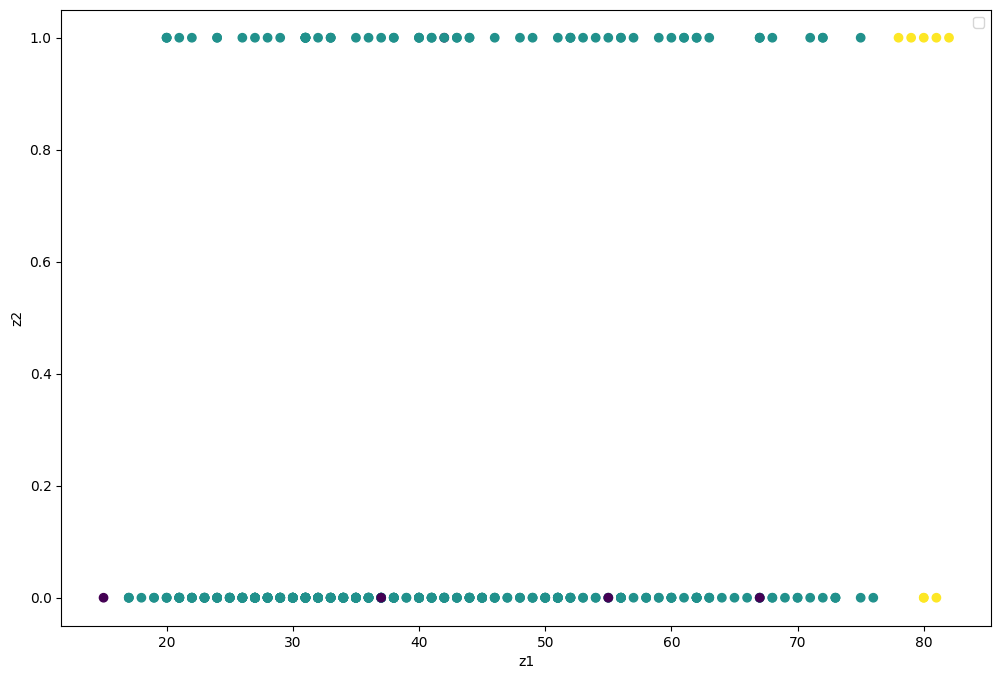

In [82]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

In [84]:
from sklearn.neighbors import NearestNeighbors
eps = 4.5 
min_samples = 2

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [85]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

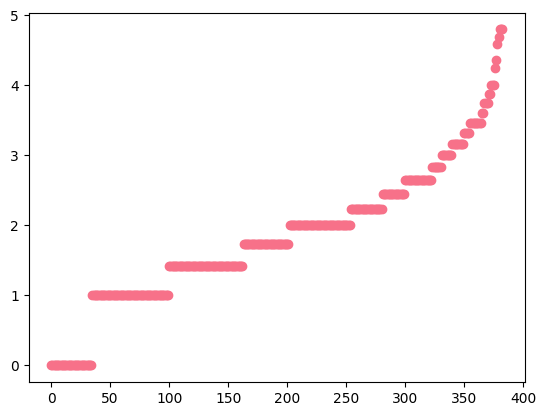

In [86]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [87]:
dbscan = DBSCAN(eps = eps, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=4.5, min_samples=2)


In [88]:
pred = dbscan.fit_predict(X)

In [89]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 5
v_measure = 0.05145942355353065


In [90]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

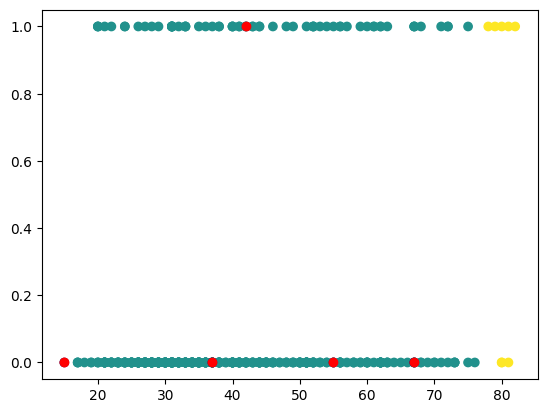

In [91]:
plt.scatter( X[cols[0]], X[cols[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols[0]], values[cols[1]], color='r')
plt.show()